# **Predicting Starbucks stock price(Capstone Project)**

Github Link: https://github.com/Dehai777/python_assignment

This Project is based on the Starbucks stock price data available from Kaggle repository.

https://www.kaggle.com/datasets/bhuwanesh340/ecommerce-price-prediction/data

# 1. Reading the Dataset

First, we need to read the dataset. This dataset comprises stock price data for Starbucks, it recorded in various intervals ranging from every five minutes to monthly. For this analysis, I chose to focus on daily, weekly, and monthly data because these intervals provide a comprehensive overview that often introduces insights rather than noise.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read file.
d1 = pd.read_csv('SBUX.US_D1.csv')
print(d1.head(5))
d1.info()

     datetime   open   high    low  close   volume
0  1998-01-02  38.38  38.63  37.31  37.50   594000
1  1998-01-05  37.63  37.78  36.75  37.13   644000
2  1998-01-06  37.13  37.38  35.56  35.63  1183300
3  1998-01-07  35.50  36.44  34.25  34.69  2039005
4  1998-01-08  34.56  36.01  34.00  35.76  1638105
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6639 entries, 0 to 6638
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  6639 non-null   object 
 1   open      6639 non-null   float64
 2   high      6639 non-null   float64
 3   low       6639 non-null   float64
 4   close     6639 non-null   float64
 5   volume    6639 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 311.3+ KB


This file contains prices for Starbucks stock spanning 6639 days.

The "datetime" column displays the time at which the stock price data was recorded.

"Open" represents the opening price of the stock.

"high" indicates the highest price of the stock for that day.

"low" signifies the lowest price of the stock for that day.

"close" displays the closing price of the stock for that day.

"volume" displays the trading volume.

# 2. Problem Statement Definition

Creating a prediction model to predict the closing prices for Starbucks stock.

Target Variable: ‘close’

Predictors: ‘open’, ‘high’, ‘low’, ‘volume’

# 3. Target Variable Identification

Generally speaking, the closing price best reflects the stock's price. So, I set the target variable as close.

# 4. Visualising the Distribution of Target Variable

In [ ]:
pip install mplfinance

Visualising data is crucial. I used the mplfinance package to create candlestick charts, which are particularly popular in financial analysis for their ability to summarise price movements vividly. Green bars indicate increases, while red bars show decreases—a quick glance tells us a lot about market and price trends.

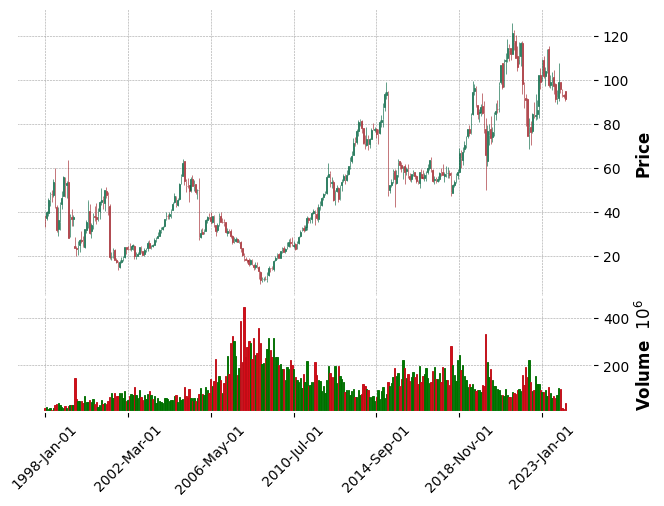

In [ ]:
import pandas as pd
import mplfinance as mpf

mn1 = pd.read_csv('SBUX.US_MN1.csv')
# draw k_line
mn1.index = pd.to_datetime(mn1['datetime'])
mn1.sort_index(inplace=True)
mpf.plot(mn1, type='candle', style='charles', volume=True)


To make a clear view of the changes in closing prices.

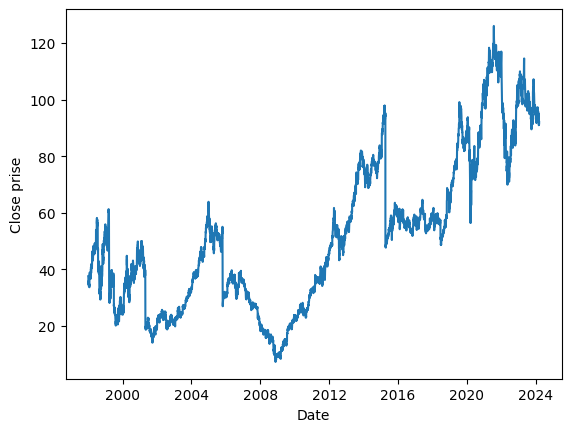

In [ ]:
# Make the datetime as index.
d1['datetime'] = pd.to_datetime(d1['datetime'])
d1.set_index('datetime', inplace=True)
# Show close
d1_close = d1['close']
plt.plot(d1_close)
plt.ylabel('Close prise')
plt.xlabel('Date')
plt.show()

# 5. Data Exploration at Basic Level

For data exploration, I add some variables to help me better understand the data. So I add the high subtract low as a new variable.

In [ ]:
# Add some parameters to help us better understand the data.
d1['H-L'] = d1['high'] - d1['low']
d1_types = d1.dtypes
# Describe data.
d1_describe = d1.describe().T
print(d1_describe)

         count          mean           std     min          25%         50%  \
open    6639.0  5.202590e+01  2.716187e+01    7.52       29.735       49.34   
high    6639.0  5.260507e+01  2.731297e+01    7.90       30.130       50.00   
low     6639.0  5.143840e+01  2.699402e+01    7.06       29.290       48.66   
close   6639.0  5.203427e+01  2.715543e+01    7.20       29.665       49.40   
volume  6639.0  5.793768e+06  4.658699e+06  300.00  2875130.000  4693841.00   
H-L     6639.0  1.166673e+00  7.950218e-01    0.00        0.640        0.94   

                75%          max  
open         71.500       126.08  
high         72.215       126.32  
low          70.680       124.81  
close        71.390       126.06  
volume  7301759.500  72344450.00  
H-L           1.450        10.62  


# 6. Identifying and Rejecting useless columns

Base on the research, there is not useless columns.

# 7. Visual Exploratory Data Analysis of Data

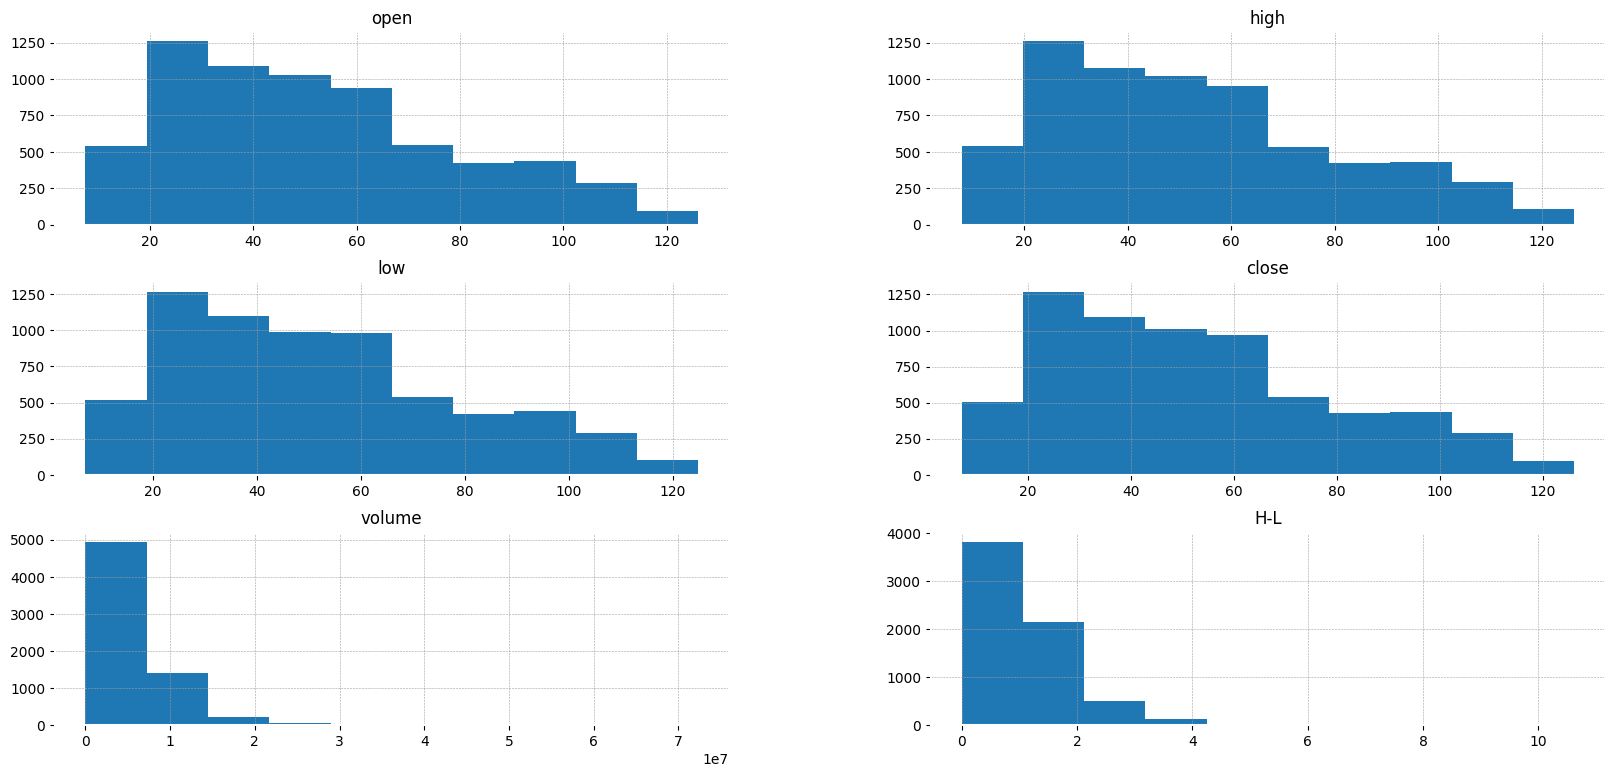

In [ ]:
# Use histograms to display each item.
columns_multi = [x for x in list(d1.columns)]
d1.hist(layout=(3, 2), column=columns_multi)
fig = plt.gcf()
fig.set_size_inches(20, 9)
plt.show()

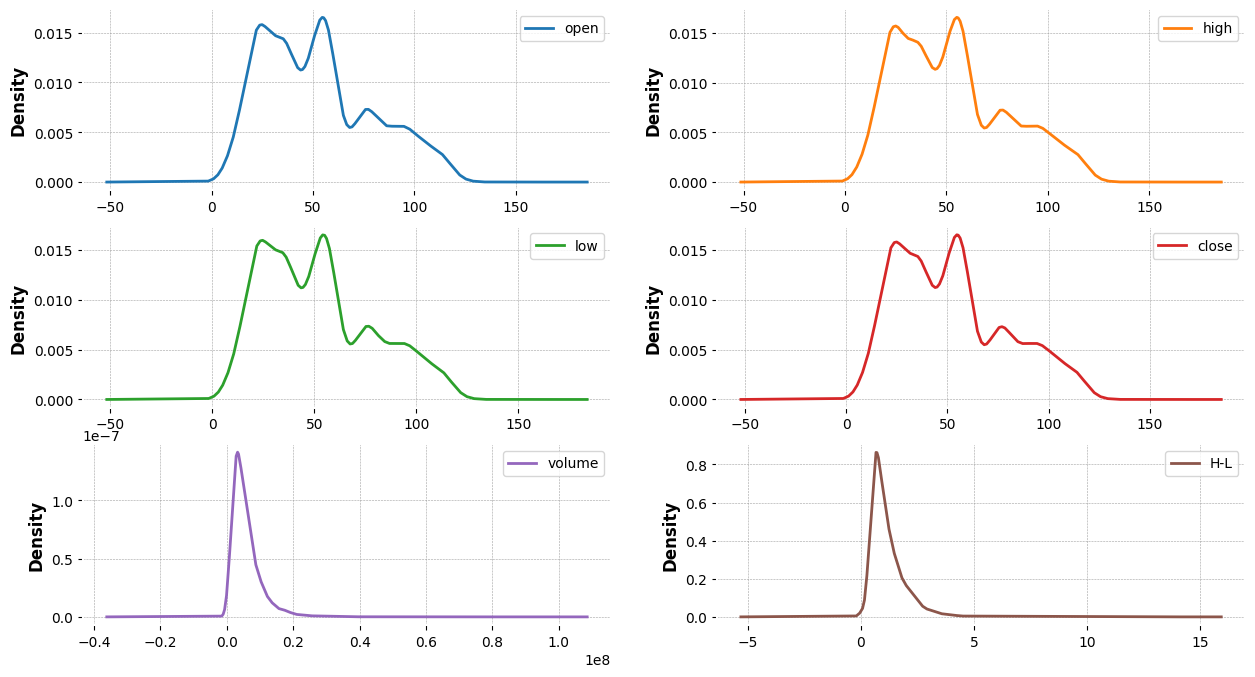

In [ ]:
# Display a density plot.
names = columns_multi
d1.plot(kind='density', subplots=True, layout=(3, 2), sharex=False)
plt.show()

 we can roughly conclude that our target variable ‘close’ can be seen as a normal variable.

# 9. Removal of Outliers and Missing Values

We can also show the missing values in a barchart.

In this project, there is not missing values. If there is, we can also remove it.

Shape after deleting duplicate values: (6639, 6)


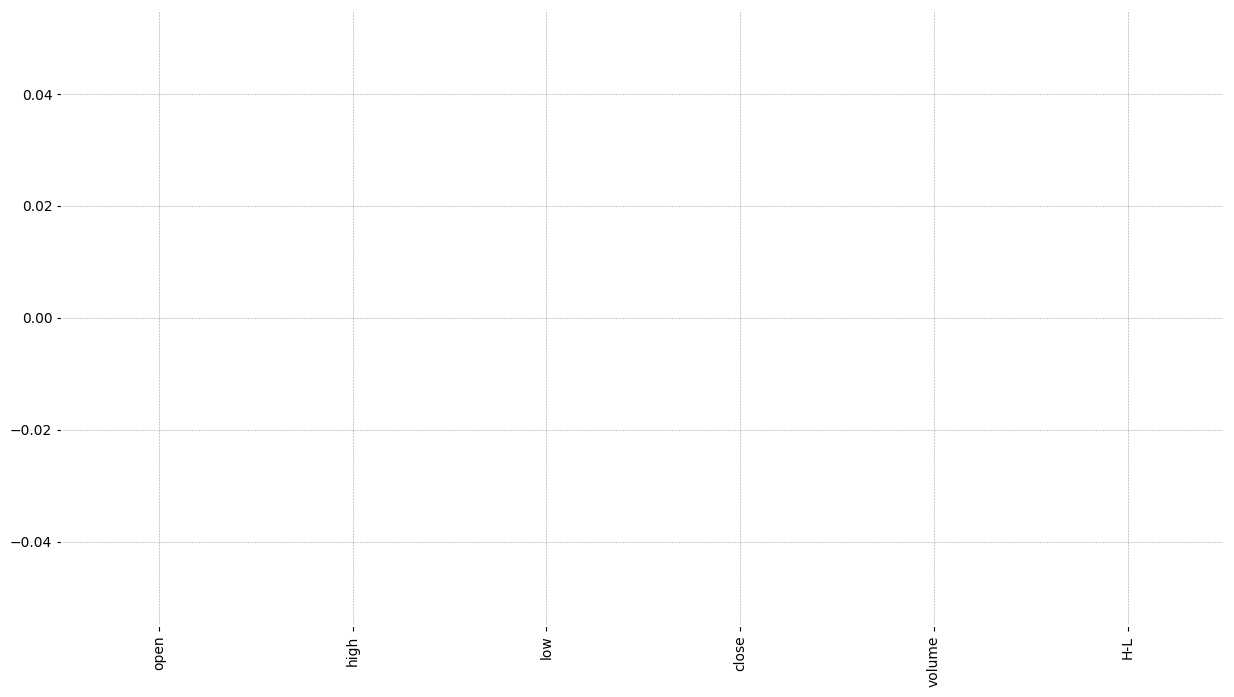

In [ ]:
# Removing duplicate rows if any
d1 = d1.drop_duplicates()
print('Shape after deleting duplicate values:', d1.shape)

# Show missing value in a barchart.
d1_missing_count = d1.isnull().sum()
plt.rcParams['figure.figsize'] = (15, 8)
d1_miss_p = d1_missing_count.plot.bar()
plt.show()

In [ ]:
# Display rows with missing data.
missing_rows = d1[d1.isnull().any(axis=1)]
print(missing_rows)

Empty DataFrame
Columns: [open, high, low, close, volume, H-L]
Index: []


# 10. Visual and Statistic Correlation analysis for selection of best features

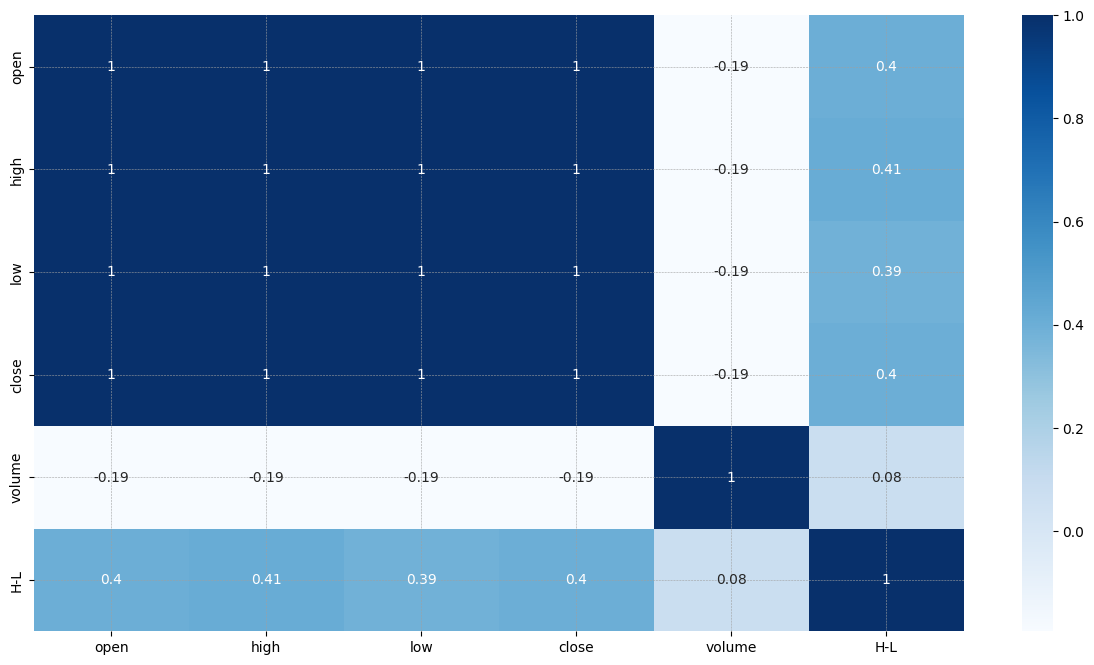

In [ ]:
# Display a heatmap to observe the correlation between the data.
d1_camp = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(d1.corr(), annot=True, cmap='Blues')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


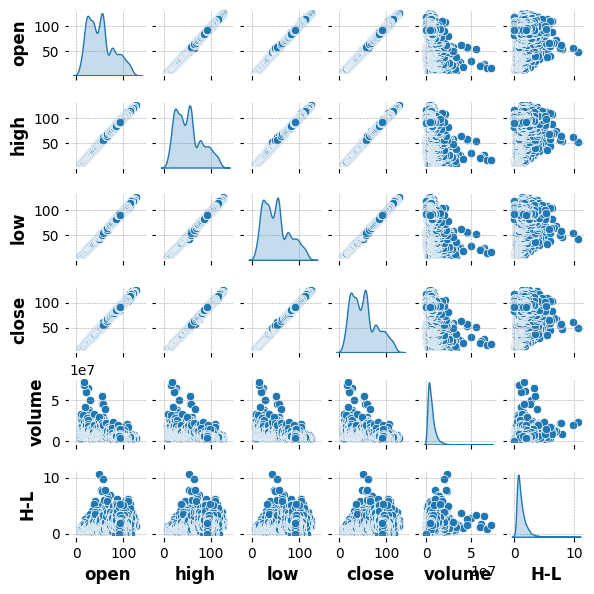

In [ ]:
# Show Joint Distribution
sns.pairplot(d1, size=1, diag_kind='kde')
plt.show()

We can observe a high correlation between the target variable 'close' and 'open,' 'high,' and 'low,' almost indicating a linear relationship. Therefore, we choose to analyse only 'close' to reduce the cost of ML training.

# 11. Linear Regression

With the data prepared, I try to find some machine learning model to predict the closing price. The weekly prices can better reflect the overall trend without being influenced by intraday fluctuations. Compared to monthly prices, the weekly data provide more data points, which can be more benefit for training. Therefore, I will use the closing prices from the weekly data as the dataset.
Typically the data split between training and testing sets should be around 4:1, I split data into a training set, spanning from 1998 to 2018, and a testing set from 2019 to 2024.


We first make the assumption that The current close price is correlated with the previous 8 week close price
So, I use numpy to divide the data into groups,  every 8 weeks of data being one group, to be used as input to predict the price of the ninth week，and iterate the training process to build a model for prediction.

In this project, I use RMSE (Root Mean Square Error) to assess the model accuracy.


Intercept: 0.2662907822764069
Coefficients: [ 0.05263355 -0.06973063  0.02014648 -0.00776107  0.02827023  0.01597462
 -0.03477608  0.99019912]


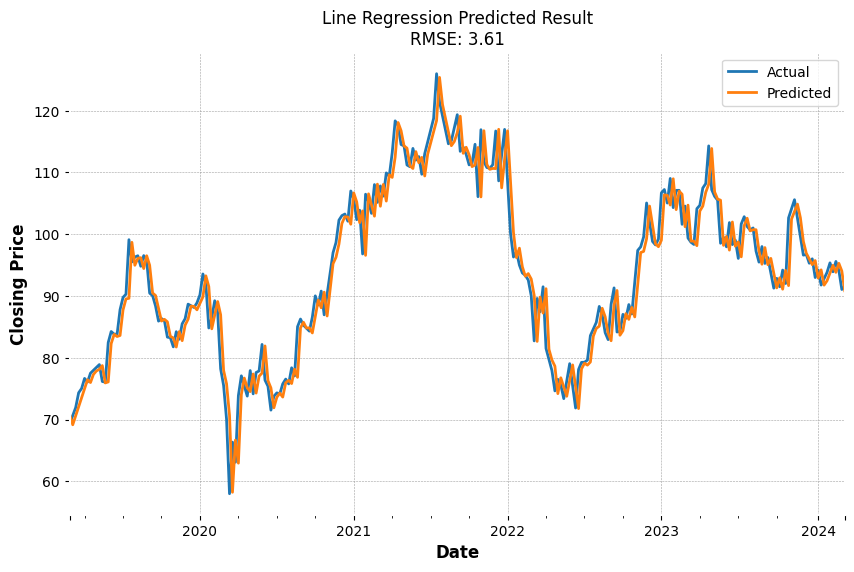

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Read data
w1 = pd.read_csv('SBUX.US_W1.csv')
# Set index
w1['datetime'] = pd.to_datetime(w1['datetime'])
w1.set_index('datetime', inplace=True)

# Split train and test sets
train_data = w1['close']['1998':'2019']
test_data = w1['close']['2019':'2024']

# Build feature matrix and target vector
X_train = np.array([train_data[i:i+8] for i in range(len(train_data)-8)])
y_train = np.array(train_data[8:])

X_test = np.array([test_data[i:i+8] for i in range(len(test_data)-8)])
y_test = np.array(test_data[8:])

# Create linear regression model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict
predictions = model.predict(X_test)

# Calculate root mean squared error
rms = sqrt(mean_squared_error(y_test, predictions))

# Create DataFrame with predicted results
results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions}, index=w1.index[-len(predictions):])

# Print model parameters
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
results['Actual'].plot(label='Actual')
results['Predicted'].plot(label='Predicted')
plt.title('Line Regression Predicted Result\nRMSE: {:.2f}'.format(rms))
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# 12. Linear Regression by 5-fold Cross Validation

To reduce the instability of evaluation results caused by data splitting or fluctuations in model performance, I have decided to use 5-fold cross-validation. Additionally, through multiple validations, we can better identify the weaknesses of the model and make improvements to enhance its accuracy.

RMS for fold 1: 3.3218041025479423
RMS for fold 2: 2.227605271348288
RMS for fold 3: 1.0495355058742202
RMS for fold 4: 3.5279876083262898
RMS for fold 5: 1.835713450013979
Average RMSE across all folds: 2.3925291876221437
RMS on test set: 3.6101974609305816
Intercept: 0.2662907822764069
Coefficients: [ 0.05263355 -0.06973063  0.02014648 -0.00776107  0.02827023  0.01597462
 -0.03477608  0.99019912]


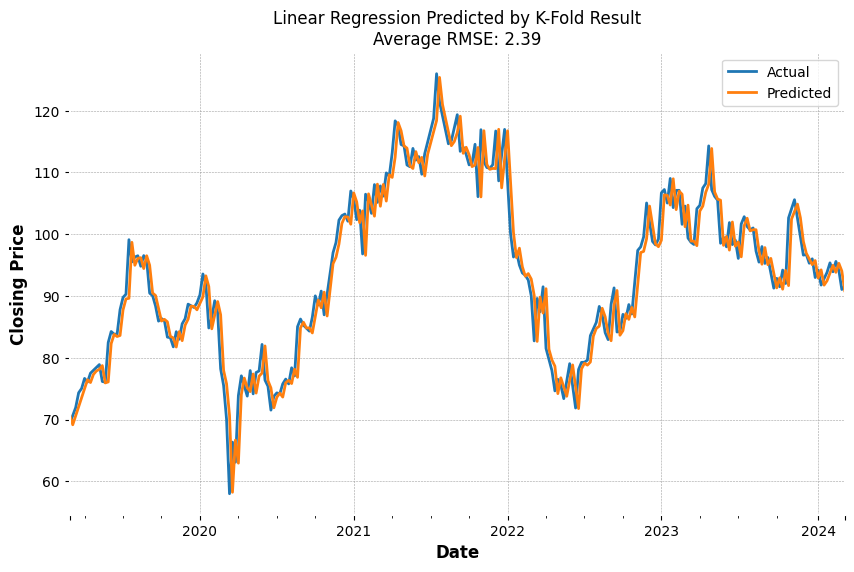

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import KFold

# Read data
w1 = pd.read_csv('SBUX.US_W1.csv')

# set index
w1['datetime'] = pd.to_datetime(w1['datetime'])
w1.set_index('datetime', inplace=True)

# Split train and test sets
train_data = w1['close']['1998':'2019']
test_data = w1['close']['2019':'2024']

# Build feature matrix and target vector
X_train = np.array([train_data[i:i+8] for i in range(len(train_data)-8)])
y_train = np.array(train_data[8:])

X_test = np.array([test_data[i:i+8] for i in range(len(test_data)-8)])
y_test = np.array(test_data[8:])

# Define the number of folds
k = 5

# Initialize KFold
kf = KFold(n_splits=k)

rms_scores = []

# Iterate over each fold
for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
    # Get training and validation data for this fold
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Create linear regression model
    model = LinearRegression()

    # Fit the model
    model.fit(X_train_fold, y_train_fold)

    # Predict on the validation set
    predictions_fold = model.predict(X_val_fold)

    # Calculate RMSE for this fold
    rms_fold = sqrt(mean_squared_error(y_val_fold, predictions_fold))
    print(f'RMS for fold {fold+1}: {rms_fold}')
    rms_scores.append(rms_fold)

# Calculate the average RMSE across all folds
avg_rms = np.mean(rms_scores)
print(f'Average RMSE across all folds: {avg_rms}')

# Create linear regression model using the entire training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
predictions = model.predict(X_test)

# Calculate root mean squared error
rms = sqrt(mean_squared_error(y_test, predictions))
print(f'RMS on test set: {rms}')

# Create DataFrame with predicted results
results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions}, index=w1.index[-len(predictions):])

# Print model parameters
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
results['Actual'].plot(label='Actual')
results['Predicted'].plot(label='Predicted')
plt.title('Linear Regression Predicted by K-Fold Result\nAverage RMSE: {:.2f}'.format(avg_rms))
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


# 13. Liner Regression (predict by one data)

Through the first two models, we can observe that the current stock price is highly correlated with the price of the previous week. Therefore, I have decided to use only one previous week price for prediction.

Intercept: [0.31209701]
Coefficients: [[0.99387743]]


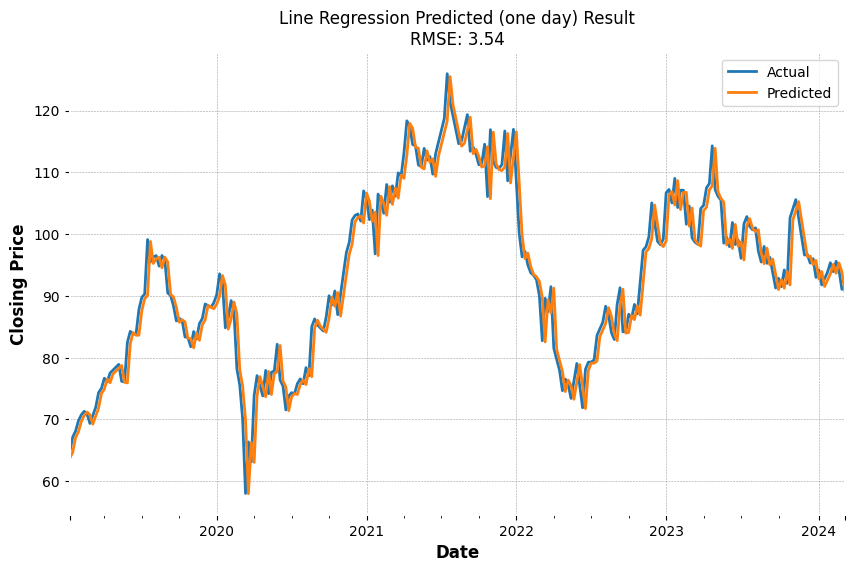

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
from math import sqrt
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Read data
w1 = pd.read_csv('SBUX.US_W1.csv')
# Set index
w1['datetime'] = pd.to_datetime(w1['datetime'])
w1.set_index('datetime', inplace=True)

# Split train and test sets
train_data = w1['close']['1998':'2019']
test_data = w1['close']['2019':'2024']

# Build feature matrix and target vector for training set
X_train = train_data[:-1].values.reshape(-1, 1)  # Use all data except the last day as features
y_train = train_data[1:].values.reshape(-1, 1)   # Shift the target vector by one day

# Build feature matrix and target vector for test set
X_test = test_data[:-1].values.reshape(-1, 1)
y_test = test_data[1:].values.reshape(-1, 1)

# Create linear regression model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict
predictions = model.predict(X_test)

# Calculate root mean squared error
rms = sqrt(mean_squared_error(y_test, predictions))

# Create DataFrame with predicted results
results = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': predictions.flatten()}, index=w1.index[-len(predictions):])

# Print model parameters
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
results['Actual'].plot(label='Actual')
results['Predicted'].plot(label='Predicted')
plt.title('Line Regression Predicted (one day) Result\nRMSE: {:.2f}'.format(rms))
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


The results are similar, but all three models exhibit overfitting, which is not good for prediction. Hence, I will explore more models.

# 14. ARIMA Model

ARIMA model is a classic time series forecasting model commonly used for analysing and predicting data with time dependencies. So I decide to use it to predict.

The autoregressive model can capture the extent to which the current stock price is influenced by the past prices

The integrated model can smooth the data fluctuations.

The moving average model can capture the fluctuation of stock prices.


In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.6 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5411.275, Time=0.91 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5411.185, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5413.124, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5413.118, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5409.571, Time=0.08 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.406 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1148
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2703.786
Date:                Fri, 03 May 2024   AIC                           5409.571
Time:                        10:20:59   BIC                           5414.616
Sample:                             0   HQIC                          5411.476
                               - 1148                                       

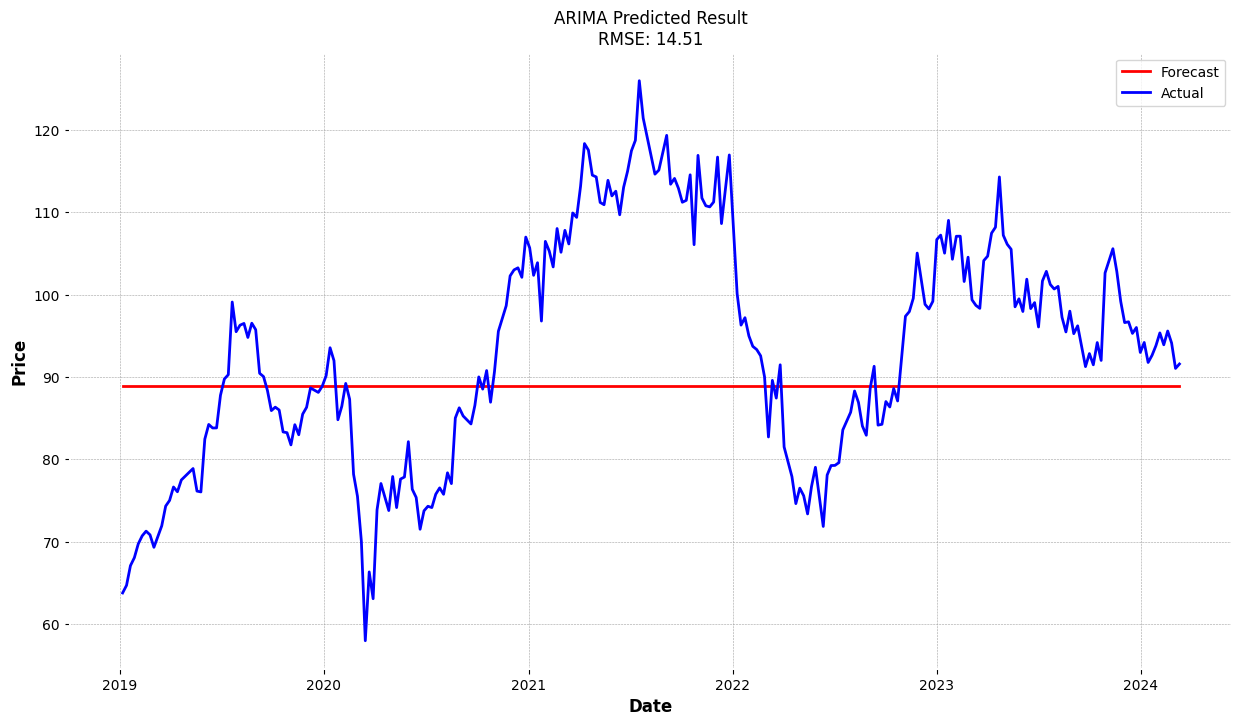

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm
import os
from math import sqrt
from sklearn.metrics import mean_squared_error

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

w1 = pd.read_csv('SBUX.US_W1.csv')

w1['datetime'] = pd.to_datetime(w1['datetime'])
w1.set_index('datetime', inplace=True)

w1_close = w1['close']
df = w1_close['1998':'2019']
df_test = w1_close['2019':'2024']

# Create model
# 1. `start_p`: Starting AR order.
# 2. `start_q`: Starting MA order.
# 3. `information_criterion`: Criterion for model selection ('aic' or 'bic').
# 4. `test`: Type of stationarity test ('adf' or other).
# 5. `max_p`: Maximum AR order.
# 6. `max_q`: Maximum MA order.
# 7. `m`: Length of seasonal cycle.
# 8. `d`: Order of differencing.
# 9. `seasonal`: Consider seasonality (True/False).
# 10. `start_P`: Starting seasonal order.
# 11. `D`: Seasonal differencing order.
# 12. `trace`: Print debugging info (True/False).
# 13. `error_action`: Action on error ('ignore' or 'warn').
# 14. `suppress_warnings`: Suppress warnings (True/False).
# 15. `stepwise`: Use stepwise search (True/False).
model = pm.auto_arima(df.values, start_p=1, start_q=1,
                      information_criterion='aic',
                      test='adf',
                      max_p=3, max_q=3,
                      m=12,
                      d=1,
                      seasonal=False,
                      start_P=0,
                      D=1,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

# Display train result
print(model.summary())

# Set the period of forcast
n_periods = len(df_test)

# Predict
arima_result = model.predict(n_periods=n_periods)

# Set the datatime as the index of the result
index_of_fc = pd.date_range(start=df_test.index[0], periods=n_periods, freq='W')

# make series for plotting purpose
arima_result_series = pd.Series(arima_result, index=index_of_fc)

rms = sqrt(mean_squared_error(df_test, arima_result_series))
print(f'RMS is {rms}')

# Display plot
plt.plot(arima_result_series.index, arima_result_series.values, color='red', label='Forecast')
plt.plot(df_test.index, df_test.values, color='blue', label='Actual')
plt.title('ARIMA Predicted Result\nRMSE: {:.2f}'.format(rms))
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


It can be observed that not only the RMSE is large, but also the predicted price does not change, indicating that it is not a suitable predictive model.

ARIMA model with seasonal factor

Since this is Starbucks' stock price, drinks sales may be influenced by seasonal factors. Therefore, I included seasonal factors in the model .

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=13.54 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=6177.246, Time=0.20 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5845.120, Time=1.28 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=8.69 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=6179.237, Time=1.00 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=5672.855, Time=3.55 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=14.07 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=5.31 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=5671.202, Time=3.11 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=5843.128, Time=1.10 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=13.98 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=6.01 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=5672.822, Time=4.90 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf, Time=24.60 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=5673.20

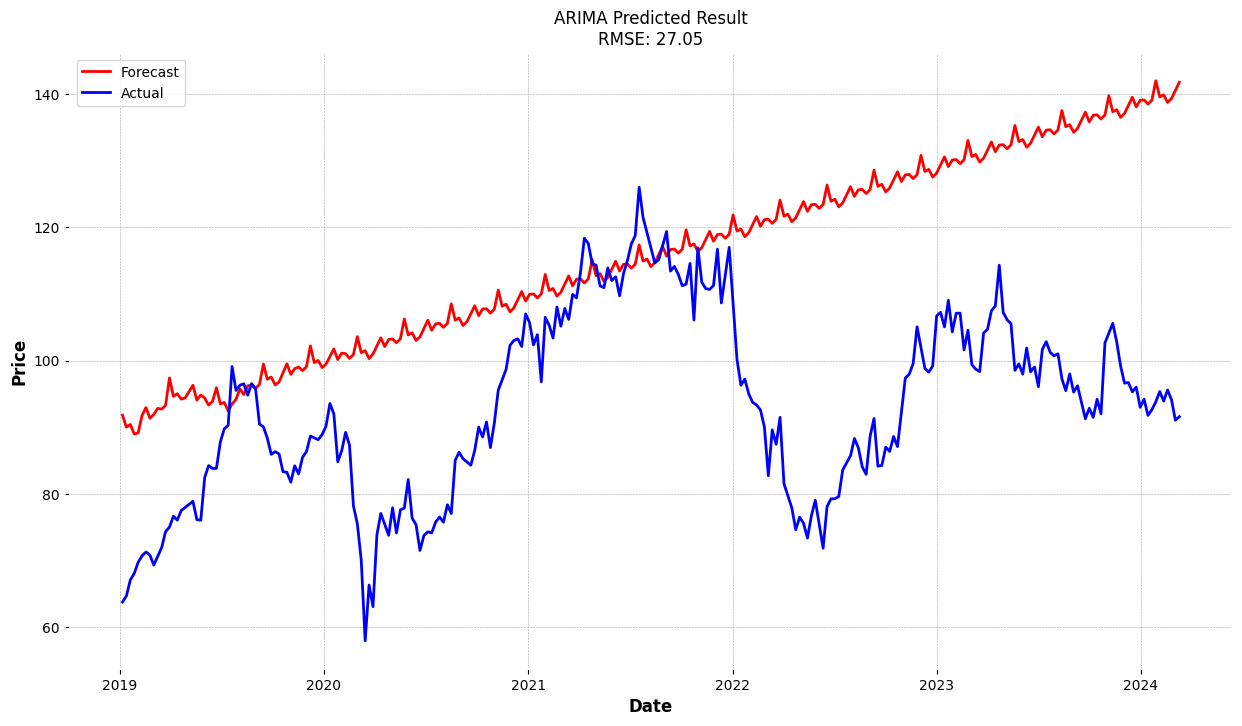

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm
import os
from math import sqrt
from sklearn.metrics import mean_squared_error

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

w1 = pd.read_csv('SBUX.US_W1.csv')

w1['datetime'] = pd.to_datetime(w1['datetime'])
w1.set_index('datetime', inplace=True)

w1_close = w1['close']
df = w1_close['1998':'2019']
df_test = w1_close['2019':'2024']

# Create model
# 1. `start_p`: Starting AR order.
# 2. `start_q`: Starting MA order.
# 3. `information_criterion`: Criterion for model selection ('aic' or 'bic').
# 4. `test`: Type of stationarity test ('adf' or other).
# 5. `max_p`: Maximum AR order.
# 6. `max_q`: Maximum MA order.
# 7. `m`: Length of seasonal cycle.
# 8. `d`: Order of differencing.
# 9. `seasonal`: Consider seasonality (True/False).
# 10. `start_P`: Starting seasonal order.
# 11. `D`: Seasonal differencing order.
# 12. `trace`: Print debugging info (True/False).
# 13. `error_action`: Action on error ('ignore' or 'warn').
# 14. `suppress_warnings`: Suppress warnings (True/False).
# 15. `stepwise`: Use stepwise search (True/False).
model = pm.auto_arima(df.values, start_p=1, start_q=1,
                      information_criterion='aic',
                      test='adf',
                      max_p=3, max_q=3,
                      m=12,
                      d=1,
                      seasonal=True,
                      start_P=0,
                      D=1,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

# Display train result
print(model.summary())

# Set the period of forcast
n_periods = len(df_test)

# Predict
arima_result = model.predict(n_periods=n_periods)

# Set the datatime as the index of the result
index_of_fc = pd.date_range(start=df_test.index[0], periods=n_periods, freq='W')

# make series for plotting purpose
arima_result_series = pd.Series(arima_result, index=index_of_fc)

rms = sqrt(mean_squared_error(df_test, arima_result_series))
print(f'RMS is {rms}')

# Display plot
plt.plot(arima_result_series.index, arima_result_series.values, color='red', label='Forecast')
plt.plot(df_test.index, df_test.values, color='blue', label='Actual')
plt.title('ARIMA Predicted Result\nRMSE: {:.2f}'.format(rms))
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


As seen in the result, the overall trend of the prediction only shows an upward trend, and the RMSE value is large, so its also not an ideal model.

# 15. LSTM Model (Long Short Term Memory)

By selectively remembering and forgetting information over time, Long short term memory models can effectively predict stock prices by recognising trends, handling non-linear relationships, and making predictions based on historical data.
As similar, I separate the data as same as the previous model, However, it is important to normalise the dataset to mitigate the significant impact of changes in a single variable on the overall model training, and then de-normalise it after prediction.

I will use the first 20 data points to predict the twenty-first data point, and you can modify it by changing the "time_stamp" parameter.

The "epochs" parameter controls how many iterations the model under-goes to learn from the data. So, I set it to 25, 50, and 75 and train the model.

By observing the RMSE for each result , to determine the best parameter.

lstm model(epochs=25)

Epoch 1/25
71/71 [==============================] - 9s 69ms/step - loss: 0.0131
Epoch 2/25
71/71 [==============================] - 4s 53ms/step - loss: 0.0032
Epoch 3/25
71/71 [==============================] - 4s 55ms/step - loss: 0.0027
Epoch 4/25
71/71 [==============================] - 5s 70ms/step - loss: 0.0025
Epoch 5/25
71/71 [==============================] - 3s 48ms/step - loss: 0.0022
Epoch 6/25
71/71 [==============================] - 3s 48ms/step - loss: 0.0019
Epoch 7/25
71/71 [==============================] - 5s 68ms/step - loss: 0.0017
Epoch 8/25
71/71 [==============================] - 4s 56ms/step - loss: 0.0018
Epoch 9/25
71/71 [==============================] - 3s 48ms/step - loss: 0.0015
Epoch 10/25
71/71 [==============================] - 5s 66ms/step - loss: 0.0016
Epoch 11/25
71/71 [==============================] - 5s 63ms/step - loss: 0.0013
Epoch 12/25
71/71 [==============================] - 4s 50ms/step - loss: 0.0013
Epoch 13/25
71/71 [==================

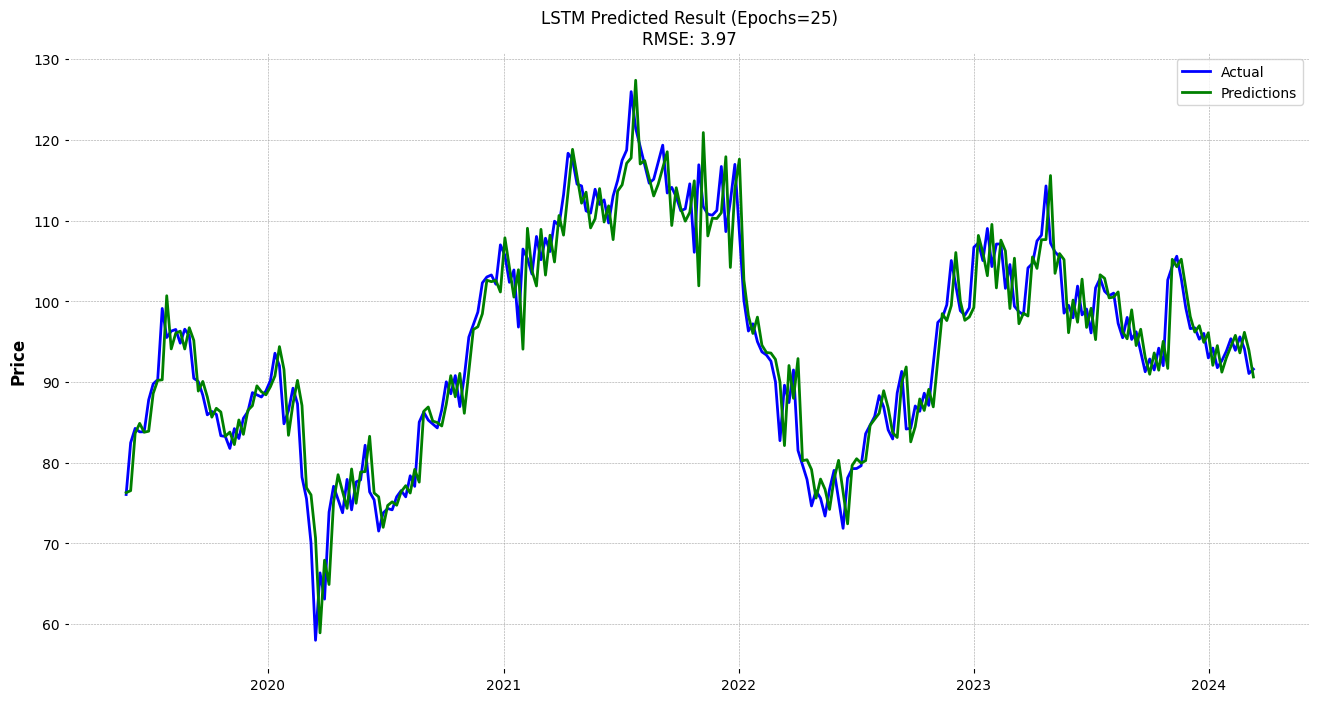

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Read file
w1 = pd.read_csv('SBUX.US_W1.csv')

# Set index
w1['datetime'] = pd.to_datetime(w1['datetime'])
w1.set_index('datetime', inplace=True)

# Divide train_data and test_data
train_data = w1['close']['1998':'2019']
test_data = w1['close']['2019':'2024']

# Normalize value
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_data = scaler.fit_transform(train_data.values.reshape(-1, 1))
scaled_test_data = scaler.transform(test_data.values.reshape(-1, 1))

# Set time_stamp
time_stamp = 20

# Train set
x_train, y_train = [], []
for i in range(time_stamp, len(scaled_train_data)):
    x_train.append(scaled_train_data[i - time_stamp:i, 0])
    y_train.append(scaled_train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

# Test set
x_test, y_test = [], []
for i in range(time_stamp, len(scaled_test_data)):
    x_test.append(scaled_test_data[i - time_stamp:i, 0])
    y_test.append(scaled_test_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

# Reshape data for LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Create and train the LSTM model
epochs = 25
batch_size = 16
model = Sequential()
model.add(LSTM(units=200, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=100))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

# Predictions
closing_price = model.predict(x_test)

# Inverse normalization
closing_price = scaler.inverse_transform(closing_price)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
rms = np.sqrt(np.mean((y_test - closing_price) ** 2))

# Plot the results
plt.figure(figsize=(16, 8))
plt.plot(test_data.index[-len(closing_price):], y_test, color='blue', label='Actual')
plt.plot(test_data.index[-len(closing_price):], closing_price, color='green', label='Predictions')
plt.legend()
plt.title(f'LSTM Predicted Result (Epochs={epochs})\nRMSE: {rms:.2f}')
plt.ylabel('Price')
plt.show()


lstm model(epochs=50)

Epoch 1/50
71/71 [==============================] - 8s 48ms/step - loss: 0.0092
Epoch 2/50
71/71 [==============================] - 4s 51ms/step - loss: 0.0029
Epoch 3/50
71/71 [==============================] - 5s 73ms/step - loss: 0.0029
Epoch 4/50
71/71 [==============================] - 3s 49ms/step - loss: 0.0022
Epoch 5/50
71/71 [==============================] - 4s 49ms/step - loss: 0.0019
Epoch 6/50
71/71 [==============================] - 4s 59ms/step - loss: 0.0019
Epoch 7/50
71/71 [==============================] - 5s 63ms/step - loss: 0.0016
Epoch 8/50
71/71 [==============================] - 4s 53ms/step - loss: 0.0016
Epoch 9/50
71/71 [==============================] - 4s 57ms/step - loss: 0.0015
Epoch 10/50
71/71 [==============================] - 5s 66ms/step - loss: 0.0015
Epoch 11/50
71/71 [==============================] - 4s 51ms/step - loss: 0.0013
Epoch 12/50
71/71 [==============================] - 8s 106ms/step - loss: 0.0013
Epoch 13/50
71/71 [=================

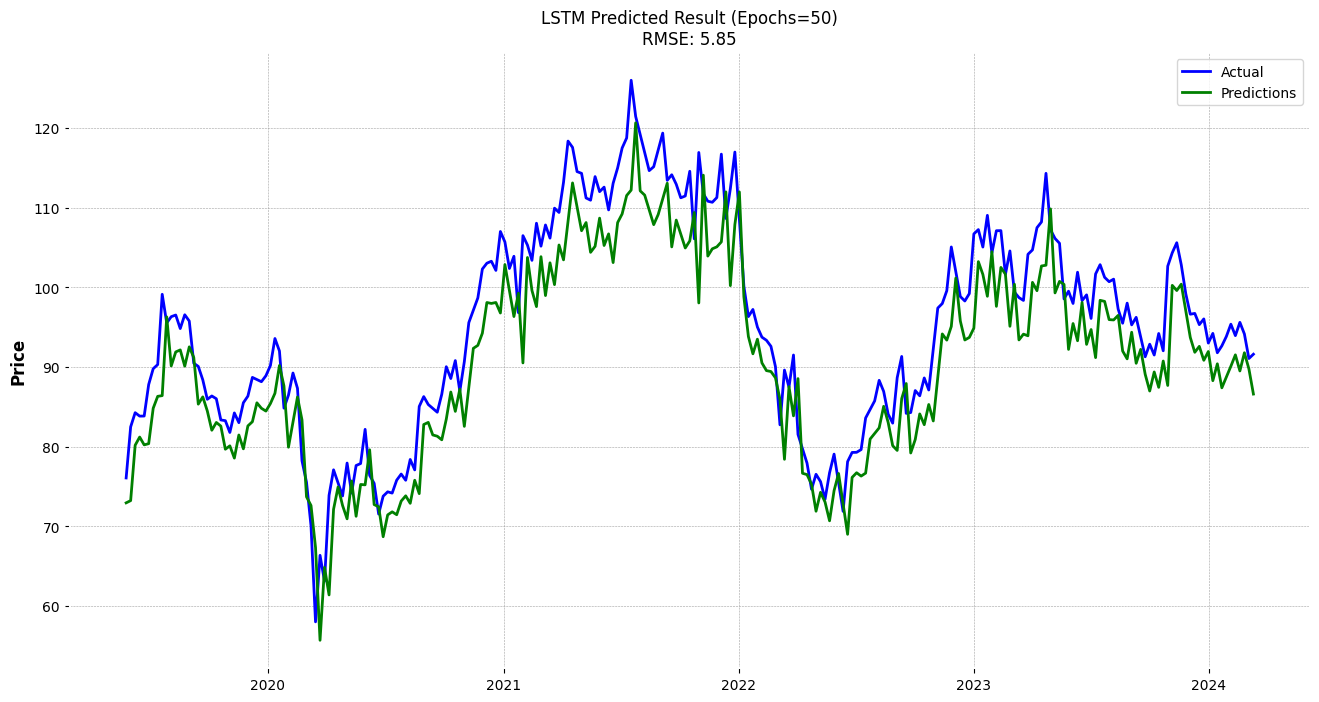

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Read file
w1 = pd.read_csv('SBUX.US_W1.csv')

# Set index
w1['datetime'] = pd.to_datetime(w1['datetime'])
w1.set_index('datetime', inplace=True)

# Divide train_data and test_data
train_data = w1['close']['1998':'2019']
test_data = w1['close']['2019':'2024']

# Normalize value
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_data = scaler.fit_transform(train_data.values.reshape(-1, 1))
scaled_test_data = scaler.transform(test_data.values.reshape(-1, 1))

# Set time_stamp
time_stamp = 20

# Train set
x_train, y_train = [], []
for i in range(time_stamp, len(scaled_train_data)):
    x_train.append(scaled_train_data[i - time_stamp:i, 0])
    y_train.append(scaled_train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

# Test set
x_test, y_test = [], []
for i in range(time_stamp, len(scaled_test_data)):
    x_test.append(scaled_test_data[i - time_stamp:i, 0])
    y_test.append(scaled_test_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

# Reshape data for LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Create and train the LSTM model
epochs = 50
batch_size = 16
model = Sequential()
model.add(LSTM(units=200, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=100))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

# Predictions
closing_price = model.predict(x_test)

# Inverse normalization
closing_price = scaler.inverse_transform(closing_price)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
rms = np.sqrt(np.mean((y_test - closing_price) ** 2))

# Plot the results
plt.figure(figsize=(16, 8))
plt.plot(test_data.index[-len(closing_price):], y_test, color='blue', label='Actual')
plt.plot(test_data.index[-len(closing_price):], closing_price, color='green', label='Predictions')
plt.legend()
plt.title(f'LSTM Predicted Result (Epochs={epochs})\nRMSE: {rms:.2f}')
plt.ylabel('Price')
plt.show()


lstm model (epochs=75)

Epoch 1/75
71/71 [==============================] - 12s 53ms/step - loss: 0.0122
Epoch 2/75
71/71 [==============================] - 5s 75ms/step - loss: 0.0029
Epoch 3/75
71/71 [==============================] - 4s 54ms/step - loss: 0.0025
Epoch 4/75
71/71 [==============================] - 4s 51ms/step - loss: 0.0022
Epoch 5/75
71/71 [==============================] - 5s 73ms/step - loss: 0.0025
Epoch 6/75
71/71 [==============================] - 4s 51ms/step - loss: 0.0019
Epoch 7/75
71/71 [==============================] - 4s 49ms/step - loss: 0.0017
Epoch 8/75
71/71 [==============================] - 6s 80ms/step - loss: 0.0015
Epoch 9/75
71/71 [==============================] - 4s 50ms/step - loss: 0.0015
Epoch 10/75
71/71 [==============================] - 4s 52ms/step - loss: 0.0014
Epoch 11/75
71/71 [==============================] - 5s 74ms/step - loss: 0.0016
Epoch 12/75
71/71 [==============================] - 3s 48ms/step - loss: 0.0013
Epoch 13/75
71/71 [=================

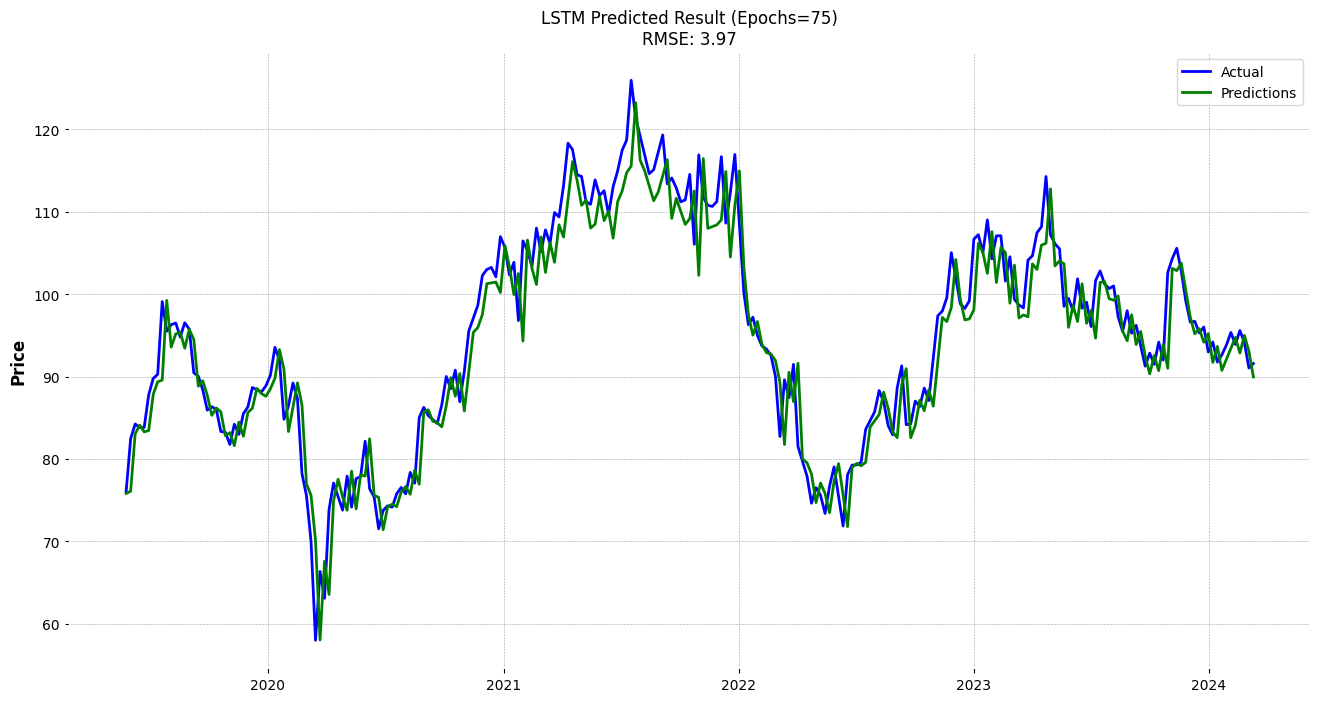

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Read file
w1 = pd.read_csv('SBUX.US_W1.csv')

# Set index
w1['datetime'] = pd.to_datetime(w1['datetime'])
w1.set_index('datetime', inplace=True)

# Divide train_data and test_data
train_data = w1['close']['1998':'2019']
test_data = w1['close']['2019':'2024']

# Normalize value
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_data = scaler.fit_transform(train_data.values.reshape(-1, 1))
scaled_test_data = scaler.transform(test_data.values.reshape(-1, 1))

# Set time_stamp
time_stamp = 20

# Train set
x_train, y_train = [], []
for i in range(time_stamp, len(scaled_train_data)):
    x_train.append(scaled_train_data[i - time_stamp:i, 0])
    y_train.append(scaled_train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

# Test set
x_test, y_test = [], []
for i in range(time_stamp, len(scaled_test_data)):
    x_test.append(scaled_test_data[i - time_stamp:i, 0])
    y_test.append(scaled_test_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

# Reshape data for LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Create and train the LSTM model
epochs = 75
batch_size = 16
model = Sequential()
model.add(LSTM(units=200, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=100))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

# Predictions
closing_price = model.predict(x_test)

# Inverse normalization
closing_price = scaler.inverse_transform(closing_price)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
rms = np.sqrt(np.mean((y_test - closing_price) ** 2))

# Plot the results
plt.figure(figsize=(16, 8))
plt.plot(test_data.index[-len(closing_price):], y_test, color='blue', label='Actual')
plt.plot(test_data.index[-len(closing_price):], closing_price, color='green', label='Predictions')
plt.legend()
plt.title(f'LSTM Predicted Result (Epochs={epochs})\nRMSE: {rms:.2f}')
plt.ylabel('Price')
plt.show()


As seen in the results., the model performs best with epochs equal to 25.
Not only does this model have a relatively small RMSE, but it also shows a certain predictive capability. Therefore, I believe using this model for stock price prediction is appropriate.

# 16. Deployment of LSTM Model

So, I deploy the LSTM model.

First, I make all data as the training data, and use epochs =25 to retrain the model. Then Use the retrain model and the least 20 weeks closing price to predict the next week closing price.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Read file
df = pd.read_csv('SBUX.US_W1.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Feature and target
x = df['close'].values.reshape(-1, 1)
y = df['close'].values

# Set time_stamp
time_stamp = 20

# Normalize values
scaler = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = scaler.fit_transform(x)

# Train set
x_train_lstm, y_train_lstm = [], []
for i in range(time_stamp, len(x_train_scaled)):
    x_train_lstm.append(x_train_scaled[i - time_stamp:i, 0])
    y_train_lstm.append(x_train_scaled[i, 0])

x_train_lstm, y_train_lstm = np.array(x_train_lstm), np.array(y_train_lstm)

# Reshape data for LSTM
x_train_lstm = np.reshape(x_train_lstm, (x_train_lstm.shape[0], x_train_lstm.shape[1], 1))

# Create and train the LSTM model
epochs = 25
batch_size = 16
model = Sequential()
model.add(LSTM(units=200, return_sequences=True, input_shape=(x_train_lstm.shape[1], 1)))
model.add(LSTM(units=100))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train_lstm, y_train_lstm, epochs=epochs, batch_size=batch_size, verbose=1)

# Predict future one time point
# Extract last 20 data points for prediction
data_to_predict = df['close'][-20:].values.reshape(-1, 1)

# Normalize data
scaled_data_to_predict = scaler.transform(data_to_predict)

# Build feature matrix
x_to_predict = np.array([scaled_data_to_predict[i:i+time_stamp, 0] for i in range(len(scaled_data_to_predict)-time_stamp + 1)])

# Reshape data for LSTM
x_to_predict = np.reshape(x_to_predict, (x_to_predict.shape[0], x_to_predict.shape[1], 1))

# Use model for prediction
predicted_price = model.predict(x_to_predict)

# Inverse normalize predicted price
predicted_price = scaler.inverse_transform(predicted_price)

# Get next week's date
next_week_date = df.index[-1] + pd.Timedelta(days=7)

# Output predicted price
print("Predicted price for the next week:", predicted_price[0][0], "on", next_week_date.strftime('%Y-%m-%d'))


Epoch 1/25
85/85 [==============================] - 14s 63ms/step - loss: 0.0072
Epoch 2/25
85/85 [==============================] - 6s 68ms/step - loss: 0.0020
Epoch 3/25
85/85 [==============================] - 5s 53ms/step - loss: 0.0017
Epoch 4/25
85/85 [==============================] - 5s 53ms/step - loss: 0.0018
Epoch 5/25
85/85 [==============================] - 6s 67ms/step - loss: 0.0016
Epoch 6/25
85/85 [==============================] - 4s 50ms/step - loss: 0.0012
Epoch 7/25
85/85 [==============================] - 4s 49ms/step - loss: 0.0013
Epoch 8/25
85/85 [==============================] - 6s 70ms/step - loss: 0.0011
Epoch 9/25
85/85 [==============================] - 4s 50ms/step - loss: 0.0011
Epoch 10/25
85/85 [==============================] - 8s 97ms/step - loss: 8.9126e-04
Epoch 11/25
85/85 [==============================] - 9s 101ms/step - loss: 9.5945e-04
Epoch 12/25
85/85 [==============================] - 6s 70ms/step - loss: 8.4235e-04
Epoch 13/25
85/85 [====

As seen in the result, the predicted stock price is 89.03.

# 17. Deployment of LSTM Model with GUI

Please try it on Github, or see it in the presentation.